In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Sheart\Sheart_NL_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.0,70.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0
1,0.0,67.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,NaN,0.0,7.0
2,1.0,57.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0
3,1.0,64.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0
4,0.0,74.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.0,52.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0
266,1.0,44.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0
267,0.0,56.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0
268,1.0,57.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	3
float64		column 2	2
float64		column 3	1
float64		column 4	2
float64		column 5	1
float64		column 6	1
float64		column 7	1
float64		column 8	2
float64		column 9	2
float64		column 10	2
float64		column 11	3
float64		column 12	2
float64		column 13	2


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,267.000000,268.000000,269.000000,268.000000,269.000000,269.000000,269.000000,268.000000,268.000000,268.000000,267.000000,268.000000,268.000000
mean,0.674157,54.350746,3.174721,131.223881,249.817844,0.148699,1.026022,150.044776,0.328358,1.057836,1.580524,0.671642,4.708955
std,0.469569,9.087389,0.951801,17.840593,51.716725,0.356455,0.997792,22.851537,0.470495,1.145866,0.616255,0.946320,1.942332
min,0.000000,29.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,0.000000,47.750000,3.000000,120.000000,213.000000,0.000000,0.000000,133.750000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,1.000000,55.000000,3.000000,130.000000,245.000000,0.000000,2.000000,154.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,1.000000,61.000000,4.000000,140.000000,281.000000,0.000000,2.000000,166.250000,1.000000,1.650000,2.000000,1.000000,7.000000
max,1.000000,77.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


<AxesSubplot:>

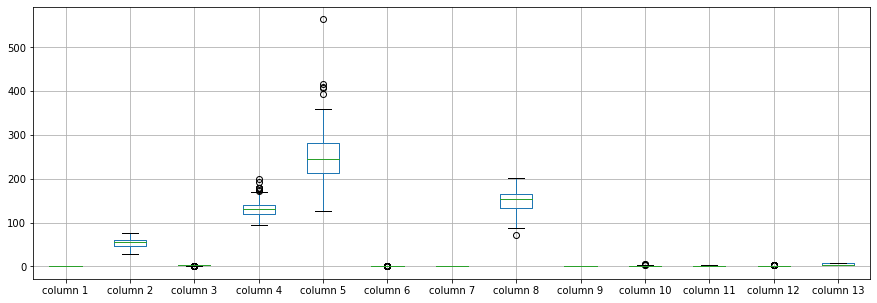

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.674157
column 2      54.350746
column 3       3.174721
column 4     131.223881
column 5     249.817844
column 6       0.148699
column 7       1.026022
column 8     150.044776
column 9       0.328358
column 10      1.057836
column 11      1.580524
column 12      0.671642
column 13      4.708955
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,-0.076162,0.036831,-0.060529,-0.201732,0.046692,0.045198,-0.082213,0.175648,0.098658,0.060323,0.094126,0.396305
column 2,-0.076162,1.000000,0.113209,0.272854,0.224654,0.129019,0.135063,-0.404775,0.101573,0.183947,0.162693,0.349762,0.113289
column 3,0.036831,0.113209,1.000000,-0.048874,0.092786,-0.096791,0.073217,-0.310007,0.353468,0.164382,0.135776,0.223008,0.267574
column 4,-0.060529,0.272854,-0.048874,1.000000,0.171220,0.160283,0.110409,-0.039519,0.075516,0.223150,0.136880,0.080208,0.125332
column 5,-0.201732,0.224654,0.092786,0.171220,1.000000,0.021831,0.170316,-0.008927,0.085814,0.027014,-0.034067,0.134088,0.030994
column 6,0.046692,0.129019,-0.096791,0.160283,0.021831,1.000000,0.050537,0.037609,-0.016016,-0.030014,0.046017,0.124050,0.048673
column 7,0.045198,0.135063,0.073217,0.110409,0.170316,0.050537,1.000000,-0.088404,0.094033,0.118809,0.156474,0.108519,0.010514
column 8,-0.082213,-0.404775,-0.310007,-0.039519,-0.008927,0.037609,-0.088404,1.000000,-0.380182,-0.339595,-0.385768,-0.241949,-0.257430
column 9,0.175648,0.101573,0.353468,0.075516,0.085814,-0.016016,0.094033,-0.380182,1.000000,0.272714,0.258397,0.147702,0.322690
column 10,0.098658,0.183947,0.164382,0.223150,0.027014,-0.030014,0.118809,-0.339595,0.272714,1.000000,0.609011,0.249081,0.320007


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+12,13+12+12,13+12+12+12,13+12+12+12+12,13+12+12+12+12+12,13+12+12+12+12,13+12+12+12,13+12+12,13+12,13], vae_layer = False, seed = 12)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 607.0055732727051
Epoch: 1 , loss: 605.2793884277344
Epoch: 2 , loss: 606.1268882751465
Epoch: 3 , loss: 607.2031555175781
Epoch: 4 , loss: 604.8141174316406
Epoch: 5 , loss: 605.5658302307129
Epoch: 6 , loss: 605.4910659790039
Epoch: 7 , loss: 605.0279960632324
Epoch: 8 , loss: 605.6689186096191
Epoch: 9 , loss: 606.8908233642578
Epoch: 10 , loss: 605.6775169372559
Epoch: 11 , loss: 605.7607841491699
Epoch: 12 , loss: 606.0922966003418
Epoch: 13 , loss: 605.9432220458984
Epoch: 14 , loss: 605.3615379333496
Epoch: 15 , loss: 606.3402938842773
Epoch: 16 , loss: 606.7061805725098
Epoch: 17 , loss: 605.3518562316895
Epoch: 18 , loss: 608.0846862792969
Epoch: 19 , loss: 605.6945877075195
Epoch: 20 , loss: 606.2049369812012
Epoch: 21 , loss: 604.0691184997559
Epoch: 22 , loss: 605.0200614929199
Epoch: 23 , loss: 606.4437561035156
Epoch: 24 , loss: 607.7695732116699
Epoch: 25 , loss: 606.5856704711914
Epoch:

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(270, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1       1.0
column 2      48.0
column 3       2.0
column 4     130.0
column 5     245.0
column 6       0.0
column 7       2.0
column 8     180.0
column 9       0.0
column 10      0.2
column 11      2.0
column 12      0.0
column 13      3.0
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Sheart.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.926076,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(339.1109591581569, 5414.752392307519)

In [17]:
NRMS=numerator/denominator
NRMS


0.06262723289802055

In [18]:
new_df.iloc[66,:]

column 1       1.000000
column 2      51.000000
column 3       4.000000
column 4     140.000000
column 5     261.000000
column 6       0.000000
column 7       2.000000
column 8     186.000000
column 9       1.000000
column 10      0.000000
column 11      1.000000
column 12      0.000000
column 13      0.225937
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.0,70.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.000000,3.0,3.0
1,0.0,67.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,0.073924,0.0,7.0
2,1.0,57.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.000000,0.0,7.0
3,1.0,64.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.000000,1.0,7.0
4,0.0,74.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.000000,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.0,52.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.000000,0.0,7.0
266,1.0,44.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.000000,0.0,7.0
267,0.0,56.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.000000,0.0,3.0
268,1.0,57.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.000000,0.0,6.0


In [21]:
imputations[-1].to_excel("Sheart_NL_1(imp).xlsx", index=False, header=False)